In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
import sys
import os

# Import classes
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

from data_loader import DataLoad
from preprocess import Preprocess
from plot import Visualization
from named_entity_recognation import CoNLLLabeler
from fine_tune_ner_model import NERFineTuner
#from Model_comparision import NERModelComparison


In [4]:
preprocess = Preprocess()
data_load = DataLoad()
plot = Visualization()

### Read and load data of different files and merge them in one dataframe

In [5]:
result = data_load.read_csv_txt_data()

In [6]:
labeled_data = data_load.lalebed_file()

In [7]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


In [8]:
result.shape

(31794, 6)

In [9]:
result.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Zemen Express®,@ZemenExpress,6014,NaN,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6014.jpg
1,Zemen Express®,@ZemenExpress,6013,💥💥..........................💥💥\r\n ...,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6013.jpg
2,Zemen Express®,@ZemenExpress,6012,NaN,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6012.jpg
3,Zemen Express®,@ZemenExpress,6011,💥💥...................................💥💥\r\n\r\...,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6011.jpg
4,Zemen Express®,@ZemenExpress,6010,NaN,2025-01-14 08:17:05+00:00,zemen_photos/@ZemenExpress_6010.jpg


### Data Tokenization, Normalizatio using Positional Tokenization

In [10]:
# Apply the tokenization function to your DataFrame
result = preprocess.tokenize_dataframe(result, message_column='Message')

In [11]:
result

,Channel Title,Channel Username,ID,Message,Date,Media Path,input_ids,attention_mask,token_type_ids,position_ids
0,Zemen Express®,@ZemenExpress,6014,NaN,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6014.jpg,None,None,None,None
1,Zemen Express®,@ZemenExpress,6013,💥💥..........................💥💥\r\n ...,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6013.jpg,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,Zemen Express®,@ZemenExpress,6012,NaN,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6012.jpg,None,None,None,None
3,Zemen Express®,@ZemenExpress,6011,💥💥...................................💥💥\r\n\r\...,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6011.jpg,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,Zemen Express®,@ZemenExpress,6010,NaN,2025-01-14 08:17:05+00:00,zemen_photos/@ZemenExpress_6010.jpg,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
31789,ምርጥ ዕቃ,@MerttEka,8,NaN,2019-10-27 11:04:38+00:00,MerttEka_photos/@MerttEka_8.jpg,None,None,None,None
31790,ምርጥ ዕቃ,@MerttEka,7,NaN,2019-10-27 10:11:52+00:00,MerttEka_photos/@MerttEka_7.jpg,None,None,None,None
31791,ምርጥ ዕቃ,@MerttEka,3,NaN,2019-10-26 13:40:07+00:00,NaN,None,None,None,None
31792,ምርጥ ዕቃ,@MerttEka,2,NaN,2019-10-26 13:39:45+00:00,NaN,None,None,None,None


### Prepare Data as Cleaned Structure

In [12]:
result = preprocess.clean_structure(result)

In [13]:
result

,Channel Title,Channel Username,ID,Date,Media Path,Content,input_ids,attention_mask,token_type_ids,position_ids
0,Zemen Express®,@ZemenExpress,6014,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6014.jpg,NaN,None,None,None,None
1,Zemen Express®,@ZemenExpress,6013,2025-01-15 05:43:58+00:00,zemen_photos/@ZemenExpress_6013.jpg,💥💥..........................💥💥\r\n ...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,Zemen Express®,@ZemenExpress,6012,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6012.jpg,NaN,None,None,None,None
3,Zemen Express®,@ZemenExpress,6011,2025-01-14 13:29:49+00:00,zemen_photos/@ZemenExpress_6011.jpg,💥💥...................................💥💥\r\n\r\...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,Zemen Express®,@ZemenExpress,6010,2025-01-14 08:17:05+00:00,zemen_photos/@ZemenExpress_6010.jpg,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
31789,ምርጥ ዕቃ,@MerttEka,8,2019-10-27 11:04:38+00:00,MerttEka_photos/@MerttEka_8.jpg,NaN,None,None,None,None
31790,ምርጥ ዕቃ,@MerttEka,7,2019-10-27 10:11:52+00:00,MerttEka_photos/@MerttEka_7.jpg,NaN,None,None,None,None
31791,ምርጥ ዕቃ,@MerttEka,3,2019-10-26 13:40:07+00:00,NaN,NaN,None,None,None,None
31792,ምርጥ ዕቃ,@MerttEka,2,2019-10-26 13:39:45+00:00,NaN,NaN,None,None,None,None


### Store Preprocessed Data in to SQLit Database

In [14]:
# Store preprocessed data to sqlit database
preprocess.store_preprocessed_data(result)

### Read Save Data from SQLit Database

In [15]:
# Fetch The data from SQLit Database
result = preprocess.ReadSavedDate('telegram_data.db', 'telegram_messages')

In [16]:
print(result.shape)
result.head()

(31794, 11)


,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids
0,1,6014,Zemen Express®,@ZemenExpress,2025-01-15T05:43:58,zemen_photos/@ZemenExpress_6014.jpg,None,None,None,None,None
1,2,6013,Zemen Express®,@ZemenExpress,2025-01-15T05:43:58,zemen_photos/@ZemenExpress_6013.jpg,💥💥..........................💥💥\r\n ...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,3,6012,Zemen Express®,@ZemenExpress,2025-01-14T13:29:49,zemen_photos/@ZemenExpress_6012.jpg,None,None,None,None,None
3,4,6011,Zemen Express®,@ZemenExpress,2025-01-14T13:29:49,zemen_photos/@ZemenExpress_6011.jpg,💥💥...................................💥💥\r\n\r\...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,5,6010,Zemen Express®,@ZemenExpress,2025-01-14T08:17:05,zemen_photos/@ZemenExpress_6010.jpg,None,None,None,None,None


In [17]:
# Apply the filter function to the Content column
result['Filtered_Content'] = result['Content'].apply(preprocess.filter_amharic_text)

# Display the resulting DataFrame
result.head()

,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids,Filtered_Content
0,1,6014,Zemen Express®,@ZemenExpress,2025-01-15T05:43:58,zemen_photos/@ZemenExpress_6014.jpg,None,None,None,None,None,None
1,2,6013,Zemen Express®,@ZemenExpress,2025-01-15T05:43:58,zemen_photos/@ZemenExpress_6013.jpg,💥💥..........................💥💥\r\n ...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",መልካም በአል ለአጠቃቀም በጣም ምቹ እና ዘመናዊ ቆሻሻ የማይዝ 7000 ዋ...
2,3,6012,Zemen Express®,@ZemenExpress,2025-01-14T13:29:49,zemen_photos/@ZemenExpress_6012.jpg,None,None,None,None,None,None
3,4,6011,Zemen Express®,@ZemenExpress,2025-01-14T13:29:49,zemen_photos/@ZemenExpress_6011.jpg,💥💥...................................💥💥\r\n\r\...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",ከጠንካራ የተሰራ ለረጅም ሰአት ሙቀትን ጠብቆ ማቆየት የሚችል 1 5 24 ...
4,5,6010,Zemen Express®,@ZemenExpress,2025-01-14T08:17:05,zemen_photos/@ZemenExpress_6010.jpg,None,None,None,None,None,None


In [18]:
df = result
# Replace "None" strings with actual NaN values
df.replace("None", pd.NA, inplace=True)

In [19]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ===== EDA =====
print("\n--- Data Overview ---")
df.head()  # Display the first few rows


--- Data Overview ---


,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids,Filtered_Content
0,1,6014,Zemen Express®,@ZemenExpress,2025-01-15 05:43:58,zemen_photos/@ZemenExpress_6014.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
1,2,6013,Zemen Express®,@ZemenExpress,2025-01-15 05:43:58,zemen_photos/@ZemenExpress_6013.jpg,💥💥..........................💥💥\r\n ...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",መልካም በአል ለአጠቃቀም በጣም ምቹ እና ዘመናዊ ቆሻሻ የማይዝ 7000 ዋ...
2,3,6012,Zemen Express®,@ZemenExpress,2025-01-14 13:29:49,zemen_photos/@ZemenExpress_6012.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
3,4,6011,Zemen Express®,@ZemenExpress,2025-01-14 13:29:49,zemen_photos/@ZemenExpress_6011.jpg,💥💥...................................💥💥\r\n\r\...,"[[101, 119, 119, 119, 119, 119, 119, 119, 119,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",ከጠንካራ የተሰራ ለረጅም ሰአት ሙቀትን ጠብቆ ማቆየት የሚችል 1 5 24 ...
4,5,6010,Zemen Express®,@ZemenExpress,2025-01-14 08:17:05,zemen_photos/@ZemenExpress_6010.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None


### Check Data Types

In [20]:
print("\n--- Data Types ---")
print(df.dtypes)  # Display column data types


--- Data Types ---
id                           int64
MESSAGE_ID                   int64
Channel_Title               object
Channel_Username            object
Date                datetime64[ns]
Media_Path                  object
Content                     object
input_ids                   object
attention_mask              object
token_type_ids              object
position_ids                object
Filtered_Content            object
dtype: object


In [21]:
print("\n--- Missing Values ---")
print(df.isnull().sum())  # Count missing values per column


--- Missing Values ---
id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path           7032
Content              8266
input_ids            8266
attention_mask       8266
token_type_ids       8266
position_ids         8266
Filtered_Content    11110
dtype: int64


### Visualize missing values

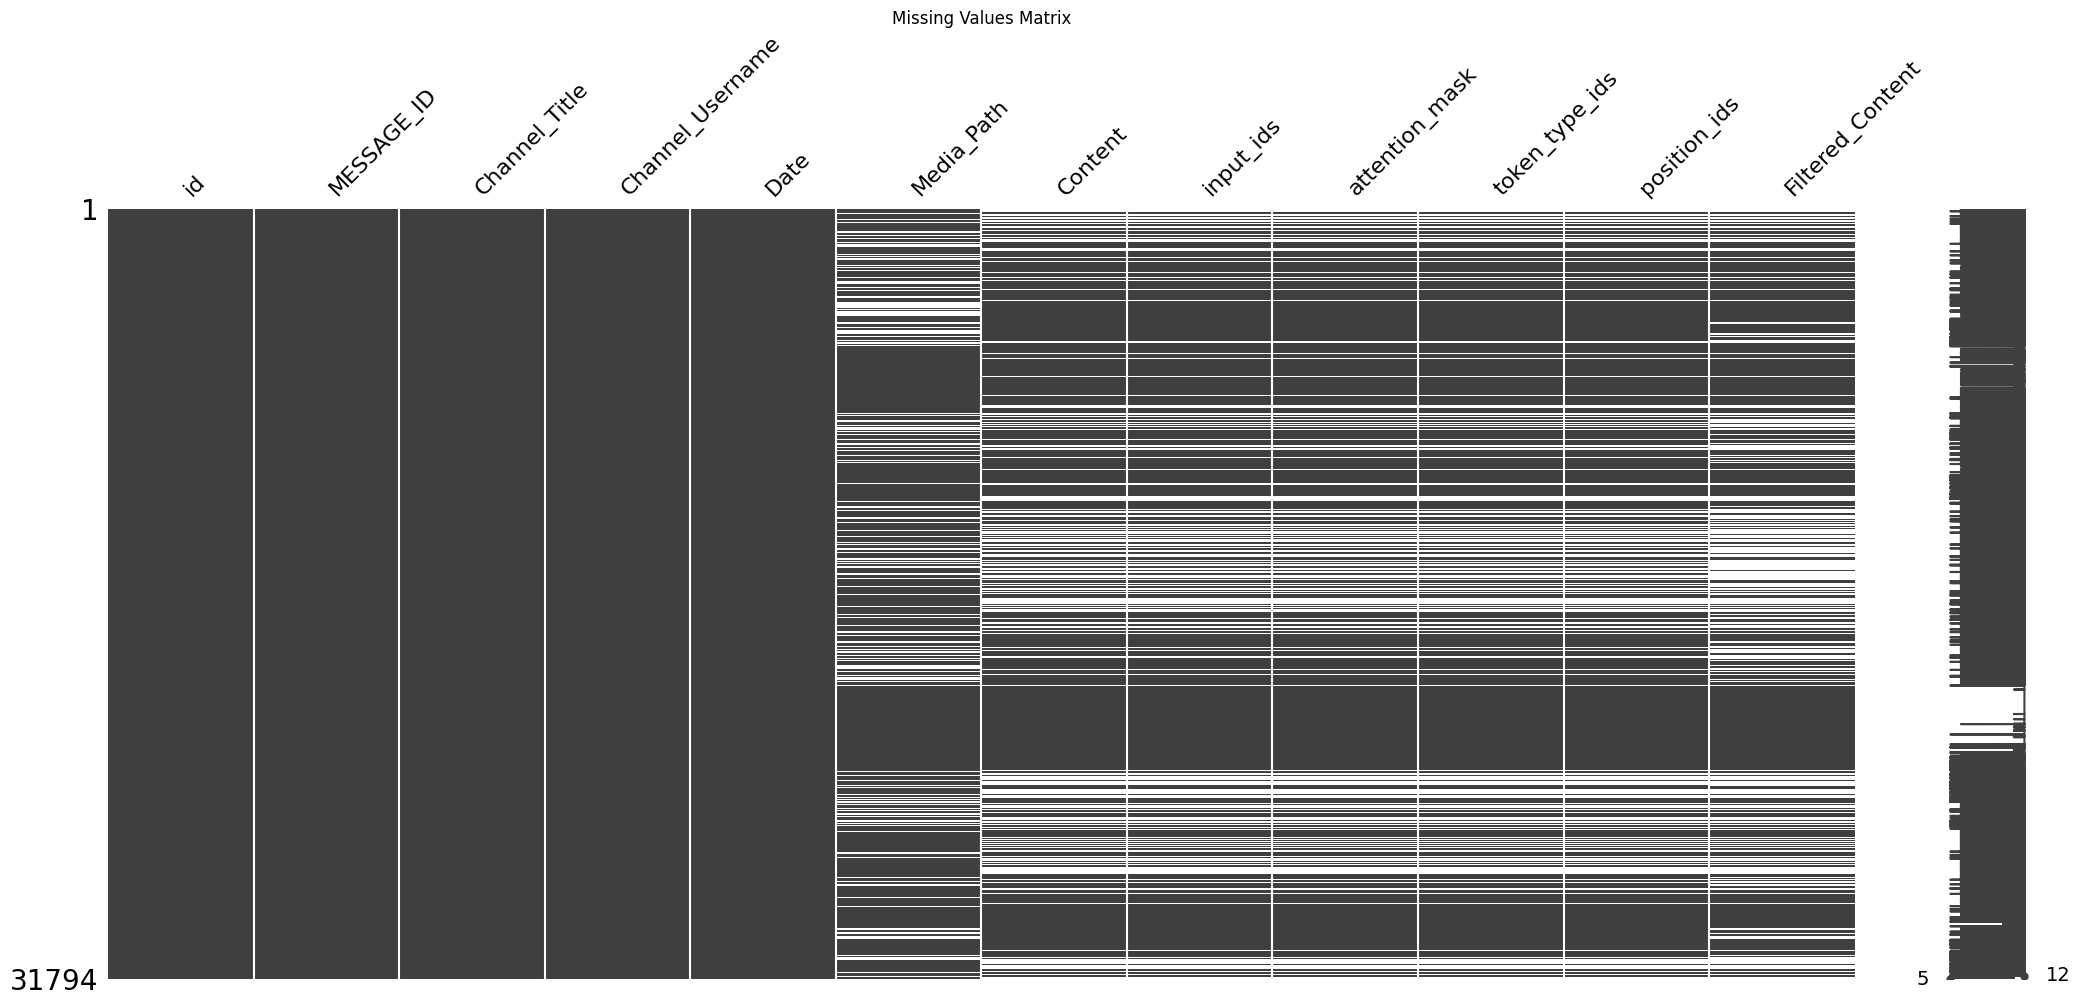

In [22]:
# Visualize missing values
plot.Visualize_missing_values(df)

### Check summary statistics

In [23]:
# Summary statistics
print("\n--- Summary Statistics Object Datatypes---")
df.describe(include='object').T


--- Summary Statistics Object Datatypes---


,count,unique,top,freq
Channel_Title,31794,7,AwasMart-አዋስማርት🎁,7718
Channel_Username,31794,7,@AwasMart,7718
Media_Path,24762,24762,MerttEka_photos/@MerttEka_7.jpg,1
Content,23528,15097,🔖🔖🔖🔖🔖🔖🔖🔖🔖🔖🔖🔖\r\nውድ ደንበኞቻችን ሱቃችን ነገ እሁድ ከ4:30-1...,46
input_ids,23528,5598,"[[101, 102]]",3835
attention_mask,23528,167,"[[1, 1]]",3835
token_type_ids,23528,167,"[[0, 0]]",3835
position_ids,23528,167,"[0, 1]",3835
Filtered_Content,20684,11710,ይሄንን ተጭነው ያድርጉ፣ ቤተሰብ ይሁኑ,151


In [24]:
# Summary statistics
print("\n--- Summary Statistics Number Datatypes---")
df.describe().T


--- Summary Statistics Number Datatypes---


,count,mean,min,25%,50%,75%,max,std
id,31794.0,15897.5,1.0,7949.25,15897.5,23845.75,31794.0,9178.281566
MESSAGE_ID,31794.0,3844.392779,1.0,2009.0,3555.0,5437.0,10157.0,2368.827654
Date,31794,2023-05-16 02:25:20.650625792,2018-08-02 07:30:19,2022-08-28 19:46:30,2023-09-16 15:24:30,2024-06-02 18:21:35.750000128,2025-01-16 10:17:04,NaN


##  Data Cleaning
###  Handle Missing Values

In [25]:
# ===== Data Cleaning =====
# Handle missing values
df_cleaned = preprocess.handlling_missing_values(df)
df_cleaned.isna().sum()


--- Handling Missing Values ---


id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path              0
Content                 0
input_ids               0
attention_mask          0
token_type_ids          0
position_ids            0
Filtered_Content    11110
dtype: int64

### Handle duplicate data

In [26]:
# Handle duplicate data
df_cleaned = preprocess.check_and_handlling_duplicate_values(df_cleaned)


--- Checking Duplicates ---
Number of duplicate rows: 0


### Check datetime Range

In [27]:
# Basic datetime analysis
print("\n--- Date Analysis ---")
print(f"Date range: {df_cleaned['Date'].min()} to {df_cleaned['Date'].max()}")


--- Date Analysis ---
Date range: 2018-08-02 07:30:19 to 2025-01-16 10:17:04


### Message count per username

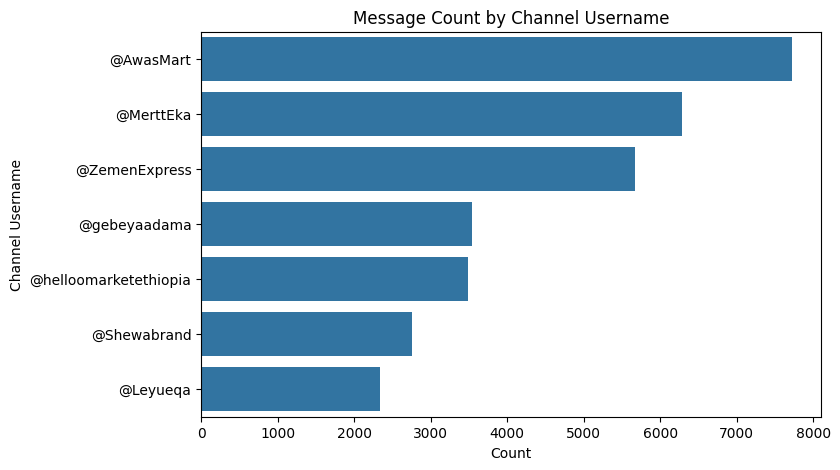

In [28]:
# ===== Visualization =====
# Message count per username
plot.message_count_per_username(df_cleaned)

### Messages over time (trend)

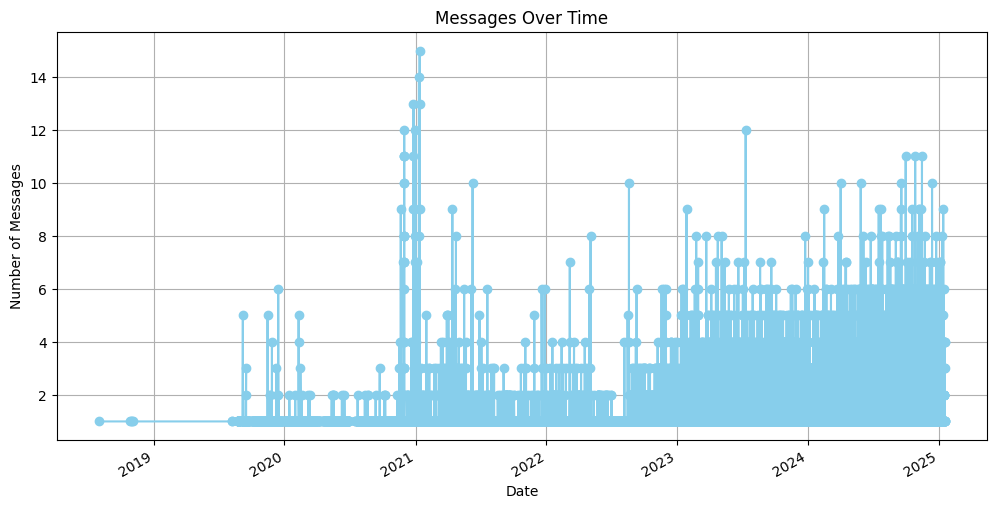

In [29]:
# Messages over time (trend)
plot.messages_over_time_trend(df_cleaned)

### Distribution of Message IDs

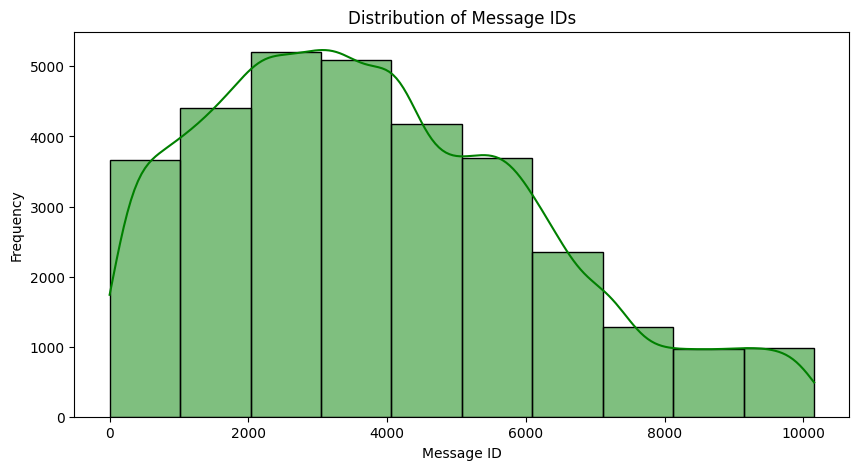

In [29]:
# Distribution of Message IDs
plot.Distribution_of_Message_IDs(df_cleaned)

### Word count in 'Content'

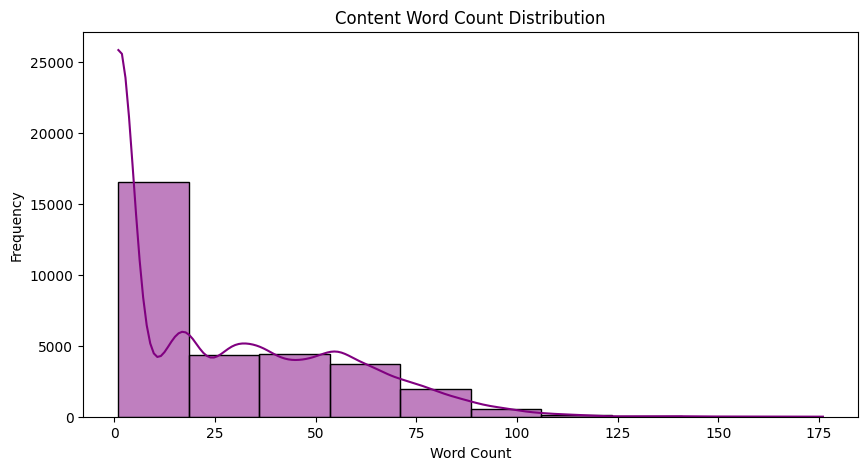

In [30]:
#  Word count in 'Content' (if available)
plot.word_count_in_content(df_cleaned)

In [28]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


In [29]:
df_cleaned.columns

Index(['id', 'MESSAGE_ID', 'Channel_Title', 'Channel_Username', 'Date',
       'Media_Path', 'Content', 'input_ids', 'attention_mask',
       'token_type_ids', 'position_ids', 'Filtered_Content'],
      dtype='object')

In [30]:
df_cleaned.head

<bound method NDFrame.head of           id  MESSAGE_ID   Channel_Title Channel_Username                Date  \
0          1        6014  Zemen Express®    @ZemenExpress 2025-01-15 05:43:58   
1          2        6013  Zemen Express®    @ZemenExpress 2025-01-15 05:43:58   
2          3        6012  Zemen Express®    @ZemenExpress 2025-01-14 13:29:49   
3          4        6011  Zemen Express®    @ZemenExpress 2025-01-14 13:29:49   
4          5        6010  Zemen Express®    @ZemenExpress 2025-01-14 08:17:05   
...      ...         ...             ...              ...                 ...   
31789  31790           8          ምርጥ ዕቃ        @MerttEka 2019-10-27 11:04:38   
31790  31791           7          ምርጥ ዕቃ        @MerttEka 2019-10-27 10:11:52   
31791  31792           3          ምርጥ ዕቃ        @MerttEka 2019-10-26 13:40:07   
31792  31793           2          ምርጥ ዕቃ        @MerttEka 2019-10-26 13:39:45   
31793  31794           1          ምርጥ ዕቃ        @MerttEka 2019-10-26 13:38:07  

## Label a Subset of Dataset in CoNLL Format

In [31]:
# Initialize the CoNLLLabeler
labeler = CoNLLLabeler(dataset=df_cleaned, labeled_data=labeled_data)

In [32]:
labeler

In [33]:
# Process 30 messages (or as many as are available)
labeled_messages = labeler.process_messages(num_messages=30)

In [33]:
labeled_messages

['መልካም O\nበአል O\nለአጠቃቀም O\nበጣም O\nምቹ O\nእና O\nዘመናዊ O\nቆሻሻ O\nየማይዝ O\n7000 I-PRICE\nዋጋ I-PRICE\n፦ O\n8200 I-PRICE\nብር I-PRICE\nውስን O\nፍሬ O\nነው O\nያለው O\nአድራሻ O\nቁ O\n1 I-PRODUCT\nመገናኛ I-LOC\nመሰረት O\nደፋር O\nሞል O\nሁለተኛ O\nፎቅ O\nቢሮ O\nቁ O\n05 O\n06 O\nቁ O\n2 I-PRICE\nፒያሳ O\nጊዮርጊስ O\nአደባባይ O\nራመት O\nታቦር O\nኦዳ O\nህንፃ O\n1ኛ O\nፎቅ O\nሱቅ O\nቁ O\n1 I-PRODUCT\n107 O\n0902660722 O\n0928460606 O\nፒያሳ O\nቅርንጫፍ O\n0941337070 O\nበ O\nለማዘዝ O\nይጠቀሙ O\nለተጨማሪ O\nማብራሪያ O\nየቴሌግራም O\nገፃችን O',
 'ከጠንካራ O\nየተሰራ O\nለረጅም O\nሰአት O\nሙቀትን O\nጠብቆ O\nማቆየት O\nየሚችል O\n1 I-PRODUCT\n5 I-PRICE\n24 I-PRICE\n12 I-PRICE\nዋጋ I-PRICE\n፦ O\n2000 I-PRICE\nብር I-PRICE\nውስን O\nፍሬ O\nነው O\nያለው O\nአድራሻ O\nቁ O\n1 I-PRODUCT\nመገናኛ I-LOC\nመሰረት O\nደፋር O\nሞል O\nሁለተኛ O\nፎቅ O\nቢሮ O\nቁ O\n05 O\n06 O\nቁ O\n2 I-PRICE\nፒያሳ O\nጊዮርጊስ O\nአደባባይ O\nራመት O\nታቦር O\nኦዳ O\nህንፃ O\n1ኛ O\nፎቅ O\nሱቅ O\nቁ O\n1 I-PRODUCT\n107 O\n0902660722 O\n0928460606 O\nፒያሳ O\nቅርንጫፍ O\n0941337070 O\nበ O\nለማዘዝ O\nይጠቀሙ O\nለተጨማሪ O\nማብራሪያ O\nየቴሌግራም O\nገፃችን O',
 '300 I-PRICE\n750 I

###  Save the labeled messages in CoNLL format

In [34]:
# Save the labeled messages in CoNLL format
output_path = "labeled_data.conll"
labeler.save_conll_format(labeled_messages, output_path)

print(f"Labeled data saved in CoNLL format to {output_path}")

Labeled data saved in CoNLL format to labeled_data.conll


In [35]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")

c:\Users\Specter\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 6/6 [00:00<00:00, 437.35 examples/s]
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")

Map: 100%|██████████| 6/6 [00:00<00:00, 524.18 examples/s]
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
#fine_tuner.train(tokenized_datasets, "./ner_model")